In [246]:
# Importar bibliotecas en esta celda
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [247]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [248]:
df = pd.read_csv('./estimaciones.csv', parse_dates=True,delimiter=';', encoding='iso-8859-1')
df.head()

,provincia_id,nom_provincia,departamento_id,nom_depto,cultivo_id,nom_cultivo,campaña_id,campaña,sup_sembrada (hectareas),sup_cosechada(hectarea),produccion (toneladas),rendimiento (kg /ha)
0,6,BUENOS AIRES,854,25 DE MAYO,1,Ajo,1,1969/1970,3.0,3.0,10,3.333
1,6,BUENOS AIRES,14,ADOLFO GONZALES CHAVES,1,Ajo,1,1969/1970,15.0,15.0,82,5.467
2,6,BUENOS AIRES,21,ALBERTI,1,Ajo,1,1969/1970,5.0,5.0,7,1.400
3,6,BUENOS AIRES,28,ALMIRANTE BROWN,1,Ajo,1,1969/1970,2.0,2.0,8,4.000
4,6,BUENOS AIRES,77,ARRECIFES,1,Ajo,1,1969/1970,6.0,6.0,15,2.500


In [249]:
precipitaciones = pd.read_csv('./precipitaciones.csv', parse_dates=True,delimiter=',', encoding='utf-8')
precipitaciones = precipitaciones.loc[:, ['Ano','M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11','M12','Total']]

In [250]:
precipitaciones

,Ano,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,Total
0,2017,64.7,172.4,82.0,"88,7","54,8","69,1","26,9","107,5","69,9",43.0,56.0,"34,5","873,7"
1,2016,193.5,133.0,3.0,122.5,54.5,32,30.5,12,28.4,114.0,57.0,58,838.4
2,2015,203.0,118.0,95.5,123,27,2,38,17.5,73.5,127.0,51.5,150.5,1026.5
3,2014,39.5,86.0,49.0,141.3,62.7,13.4,53.5,69,76.6,276.0,67.5,29.0,963.5
4,2013,60.3,3.0,61.0,89.5,4.0,0.0,40.8,0.0,90.0,51.0,39.5,15.0,454.1
5,2012,123.5,103.5,104.5,28.0,59.5,2.8,0.0,98.5,37.5,122.5,77.0,147.5,904.8
6,2011,185.2,33.3,59.0,57.0,22.5,18.8,14.0,15.5,0.8,97.8,193.5,14.0,711.4
7,2010,40.7,109.4,57.4,2.8,10.7,19.2,15.2,1.8,100.5,51.4,57.0,7.8,473.9
8,2009,9.0,23.0,65.5,0.0,19.2,0.2,24.0,2.5,55.0,8.5,71.5,194.5,472.9
9,2008,84.5,76.9,75.2,5.2,14.0,10.0,23.5,13.0,47.0,54.2,12.0,59.0,474.5


In [251]:
df_trigo = df.loc[(df.nom_cultivo == 'Trigo') & (df.nom_depto == 'PUAN')].copy()

In [252]:
df_trigo['campaña'] = df_trigo['campaña'].str.split('/')

In [253]:
df_trigo['inicio'] = df_trigo['campaña'].apply(lambda x : int(x[0]))

In [254]:
df_trigo['final'] = df_trigo['campaña'].apply(lambda x : int(x[1]))

In [255]:
df_trigo = df_trigo.loc[(df_trigo.inicio >= 1998) & (df_trigo.inicio <= 2017)]

In [256]:
df_trigo

,provincia_id,nom_provincia,departamento_id,nom_depto,cultivo_id,nom_cultivo,campaña_id,campaña,sup_sembrada (hectareas),sup_cosechada(hectarea),produccion (toneladas),rendimiento (kg /ha),inicio,final
98464,6,BUENOS AIRES,651,PUAN,28,Trigo,30,"[1998, 1999]",121.30,121.30,220.000,1.814,1998,1999
101380,6,BUENOS AIRES,651,PUAN,28,Trigo,31,"[1999, 2000]",126.30,106.30,108.500,1.021,1999,2000
103644,6,BUENOS AIRES,651,PUAN,28,Trigo,32,"[2000, 2001]",127.00,127.00,305.000,2.402,2000,2001
105364,6,BUENOS AIRES,651,PUAN,28,Trigo,33,"[2001, 2002]",141.30,138.40,320.000,2.312,2001,2002
106990,6,BUENOS AIRES,651,PUAN,28,Trigo,34,"[2002, 2003]",140.00,139.40,322.300,2.312,2002,2003
108754,6,BUENOS AIRES,651,PUAN,28,Trigo,35,"[2003, 2004]",111.30,111.30,166.950,1.500,2003,2004
110486,6,BUENOS AIRES,651,PUAN,28,Trigo,36,"[2004, 2005]",121.30,121.30,266.990,2.201,2004,2005
112216,6,BUENOS AIRES,651,PUAN,28,Trigo,37,"[2005, 2006]",111.30,90.90,72.720,800.000,2005,2006
113968,6,BUENOS AIRES,651,PUAN,28,Trigo,38,"[2006, 2007]",96.00,96.00,105.400,1.098,2006,2007
115815,6,BUENOS AIRES,651,PUAN,28,Trigo,39,"[2007, 2008]",86.30,81.20,162.400,2.000,2007,2008


In [257]:
print(len(precipitaciones), len(df_trigo))

20 20


In [258]:
df_trigo = df_trigo.merge(precipitaciones, left_on='inicio', right_on='Ano', how='left')

In [259]:
df_trigo.head()

,provincia_id,nom_provincia,departamento_id,nom_depto,cultivo_id,nom_cultivo,campaña_id,campaña,sup_sembrada (hectareas),sup_cosechada(hectarea),produccion (toneladas),rendimiento (kg /ha),inicio,final,Ano,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,Total
0,6,BUENOS AIRES,651,PUAN,28,Trigo,30,"[1998, 1999]",121.3,121.3,220.000,1.814,1998,1999,1998,214.4,254.4,20.4,101.0,31.0,9.8,2.4,22.6,47.2,5.8,116.2,63.0,888.2
1,6,BUENOS AIRES,651,PUAN,28,Trigo,31,"[1999, 2000]",126.3,106.3,108.500,1.021,1999,2000,1999,153.8,92.2,142.0,77.0,21.6,11.8,18.0,9.6,69.6,51.2,146.2,117.2,910.2
2,6,BUENOS AIRES,651,PUAN,28,Trigo,32,"[2000, 2001]",127.0,127.0,305.000,2.402,2000,2001,2000,46.2,166.2,111.0,20.0,115.2,14.8,9.4,66.6,43.6,131.8,19.8,1.4,746.0
3,6,BUENOS AIRES,651,PUAN,28,Trigo,33,"[2001, 2002]",141.3,138.4,320.000,2.312,2001,2002,2001,126.0,117.0,143.0,118.0,34.5,11.5,15.0,42.0,153.5,174.0,126.8,20.5,1081.8
4,6,BUENOS AIRES,651,PUAN,28,Trigo,34,"[2002, 2003]",140.0,139.4,322.300,2.312,2002,2003,2002,13.5,89.0,42.5,50.3,56.5,4.0,34.5,105.5,27.0,91.0,113.0,61.5,688.3


In [260]:
df_trigo.dtypes

provincia_id                  int64
nom_provincia                object
departamento_id               int64
nom_depto                    object
cultivo_id                    int64
nom_cultivo                  object
campaña_id                    int64
campaña                      object
sup_sembrada (hectareas)    float64
sup_cosechada(hectarea)     float64
produccion (toneladas)       object
rendimiento (kg /ha)        float64
inicio                        int64
final                         int64
Ano                           int64
M1                          float64
M2                          float64
M3                          float64
M4                           object
M5                           object
M6                           object
M7                           object
M8                           object
M9                           object
M10                         float64
M11                         float64
M12                          object
Total                       

In [261]:
df_trigo['rendimiento (kg /ha)']

0       1.814
1       1.021
2       2.402
3       2.312
4       2.312
5       1.500
6       2.201
7     800.000
8       1.098
9       2.000
10    800.000
11    806.000
12      1.959
13      2.497
14      2.984
15      2.200
16      2.602
17      3.187
18      2.800
19      3.000
Name: rendimiento (kg /ha), dtype: float64

In [266]:
df_trigo['inicio']

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
15    2013
16    2014
17    2015
18    2016
19    2017
Name: inicio, dtype: int64

In [265]:
df_trigo['Total']

0      888.2
1      910.2
2      746.0
3     1081.8
4      688.3
5      539.0
6      869.0
7      487.5
8      584.7
9      708.5
10     474.5
11     472.9
12     473.9
13     711.4
14     904.8
15     454.1
16     963.5
17    1026.5
18     838.4
19     873,7
Name: Total, dtype: object

In [262]:
df_trigo.at[7, 'rendimiento (kg /ha)'] = 0.8
df_trigo.at[10, 'rendimiento (kg /ha)'] = 0.8
df_trigo.at[11, 'rendimiento (kg /ha)'] = 0.806

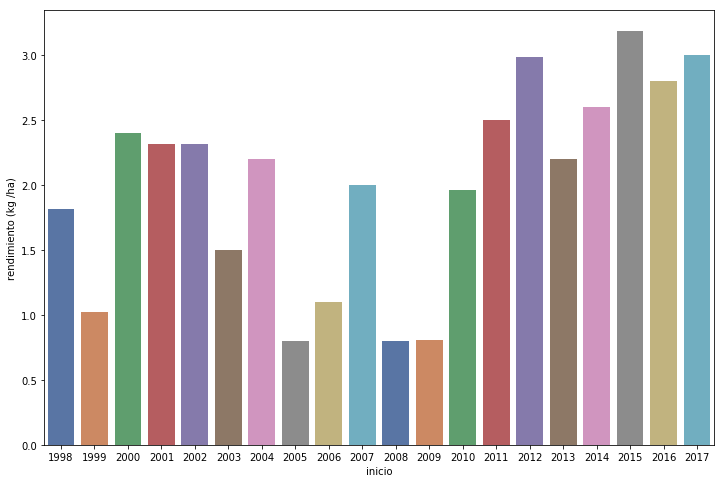

In [272]:
sns.barplot(x=df_trigo['inicio'], y=df_trigo['rendimiento (kg /ha)'], palette="deep")

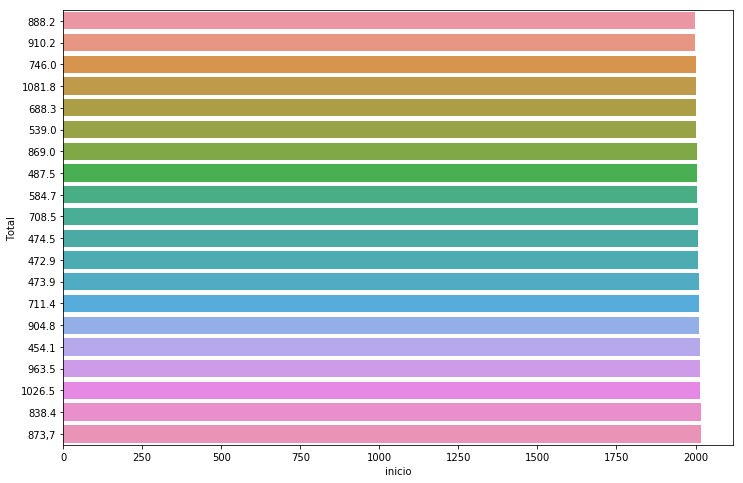

In [273]:
#sns.barplot(x=df_trigo['inicio'], y=df_trigo['Total'], palette="deep")
sns.barplot(x="inicio", y="Total", data=df_trigo)